In [15]:
import numpy as np
import matplotlib.pyplot as plt
from preseimei import movie_lc_ana
import glob

bin_t = 10
r_ap = 20
obs_date = "20220524"
out_dir = "/alps/south/reduced/%s_analyzed/movies/*/g_band" % obs_date
names = glob.glob(out_dir + "*")

/alps/south/reduced/20220524_analyzed/movies/WD_triccs6/g_band
/alps/south/reduced/20220524_analyzed/movies/WD_new11/g_band


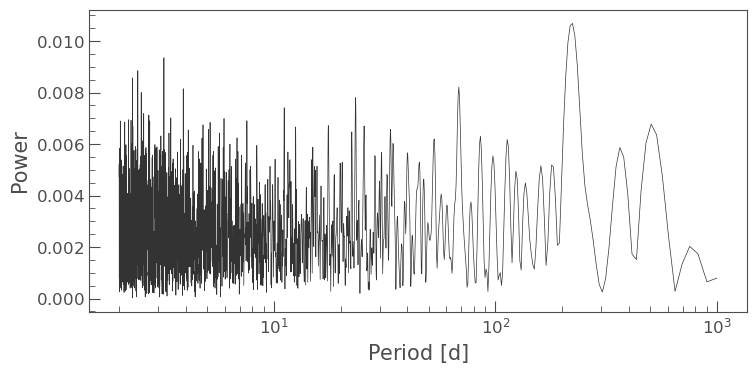

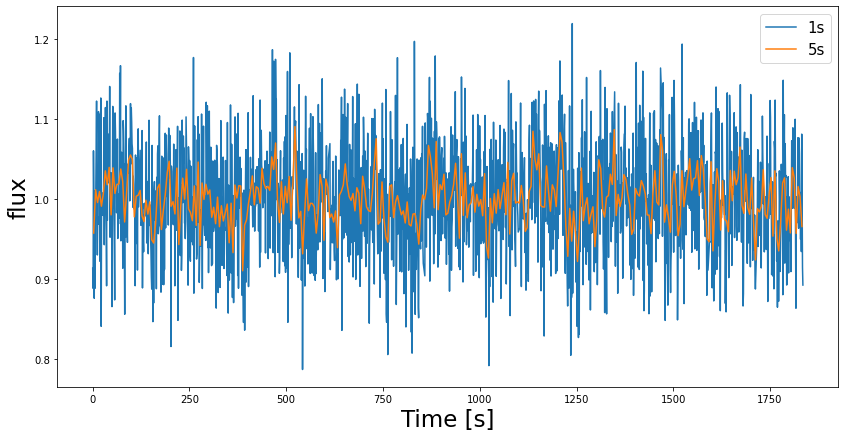

/alps/south/reduced/20220524_analyzed/movies/SDSSJ103941.52-032534.2/g_band


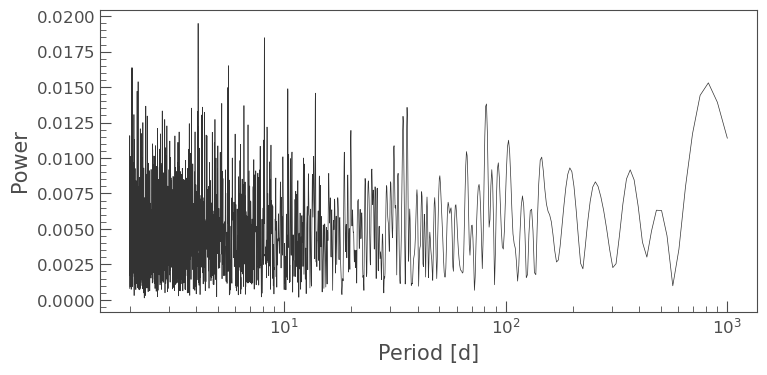

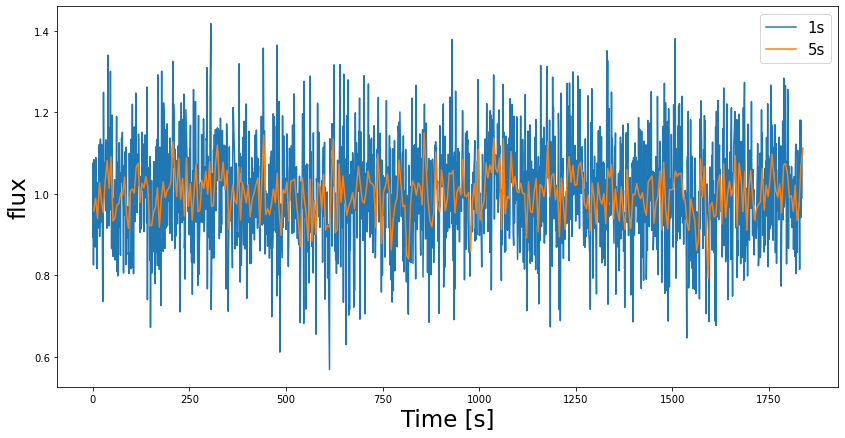

/alps/south/reduced/20220524_analyzed/movies/WD_new14/g_band


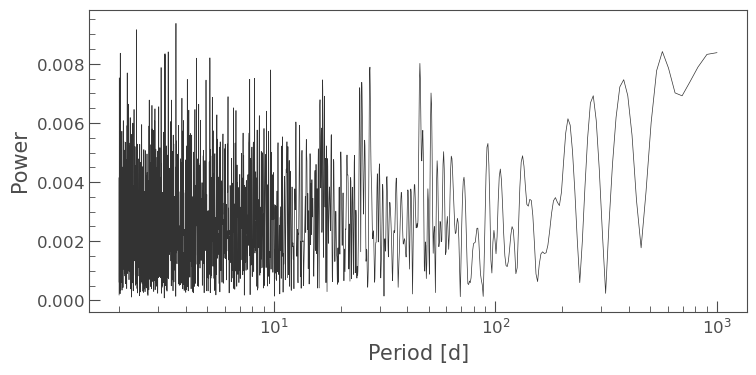

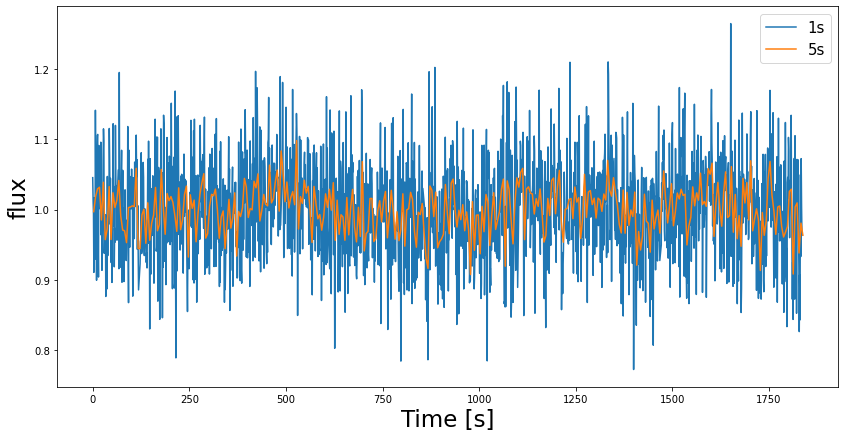

/alps/south/reduced/20220524_analyzed/movies/WD_triccs2/g_band
/alps/south/reduced/20220524_analyzed/movies/SDSSJ154315.09+302133.5/g_band


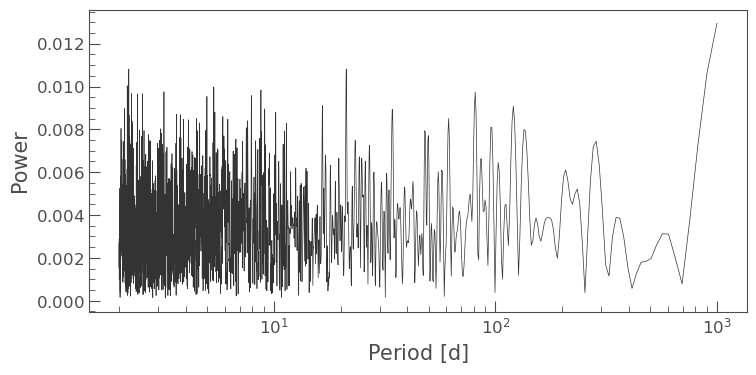

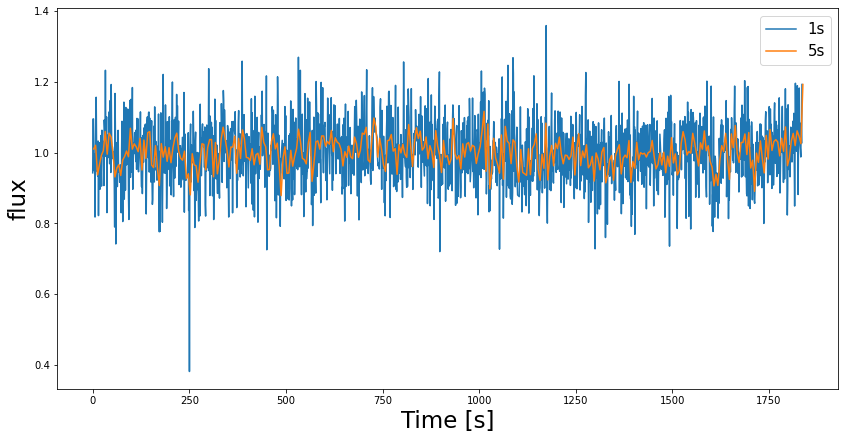

/alps/south/reduced/20220524_analyzed/movies/WD_triccs8/g_band


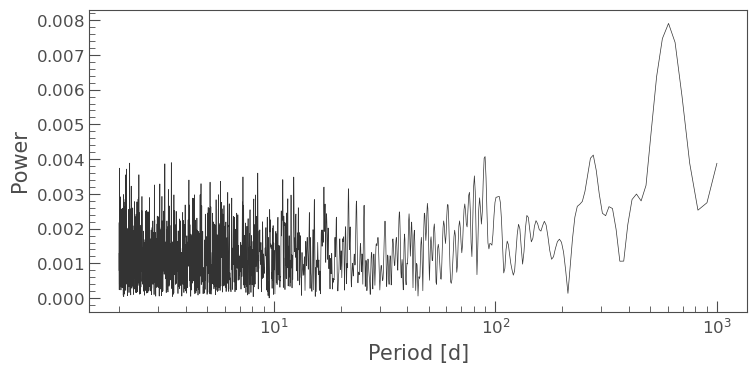

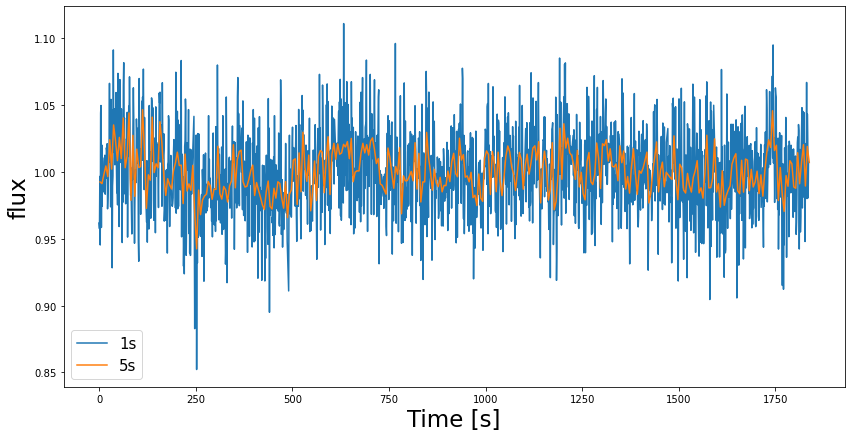

/alps/south/reduced/20220524_analyzed/movies/WD_triccs18/g_band


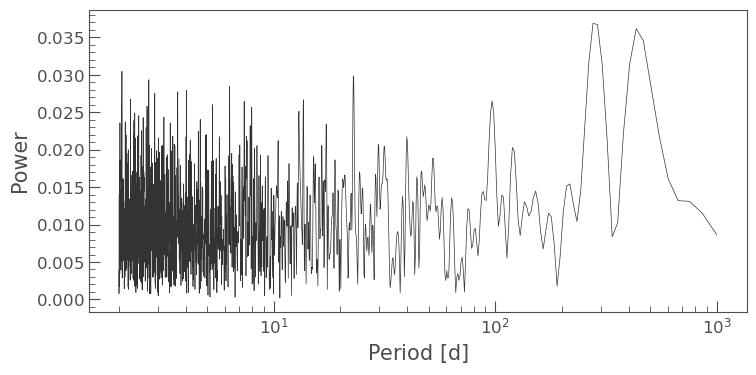

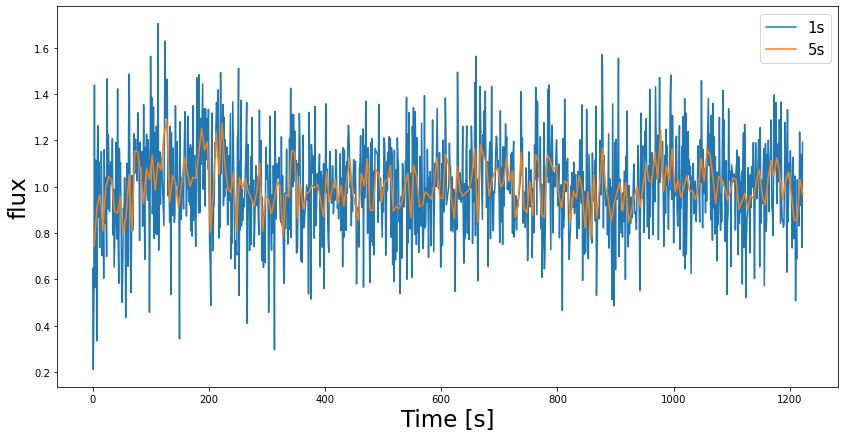

In [16]:
for name in names:
    files = glob.glob(name + "/target_processed_*_lc%d.npz" % r_ap)
    files = sorted(files)
    print(name)
    for file in files:
        data_g = np.load(file)
        time_target = data_g["time"]
        flux_target_pca = data_g["lc_pca"]
        flux_least = data_g["lc_least_var"]
        movie_lc_ana.show_periodogram_and_lc(time_target - np.min(time_target), flux_target_pca, maximum_period=1000, minimum_period=2)  
        """
        plt.figure(figsize = (10,8))
        plt.plot(time_target, least_lc , label="g")
        plt.legend()
        plt.title("%s" % file.split("/")[-1])
        plt.show()
        """


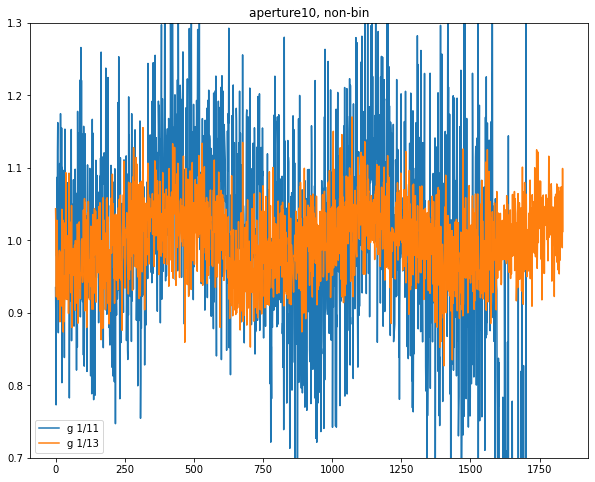

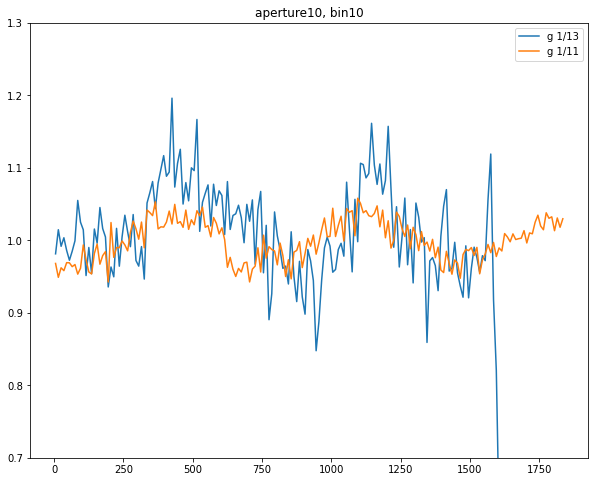

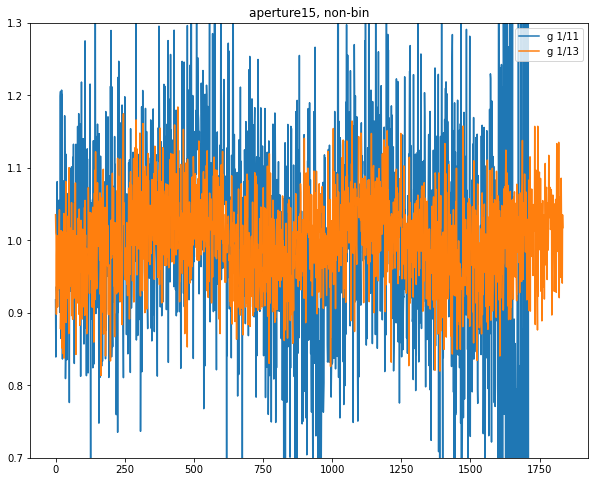

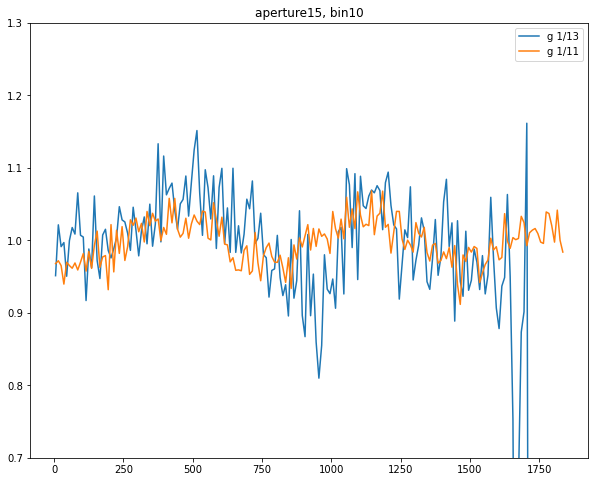

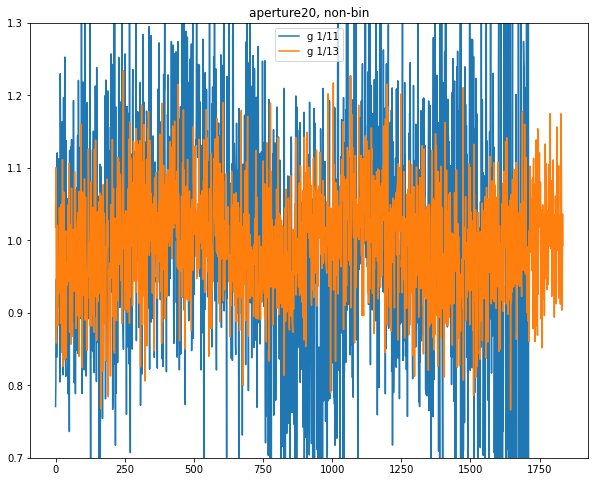

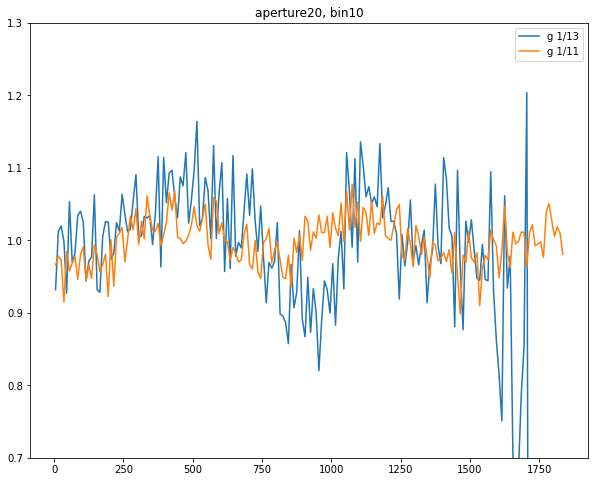

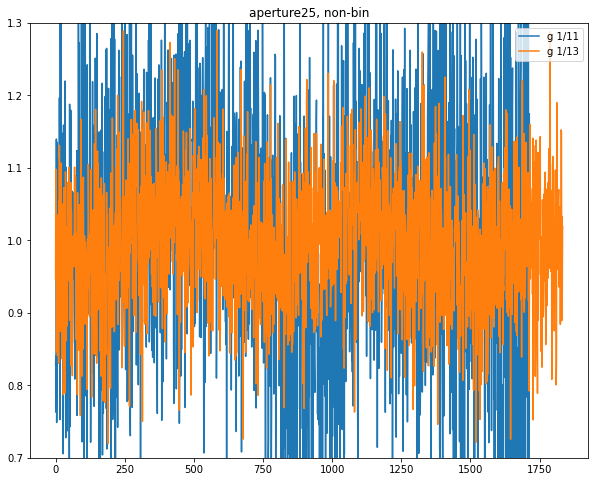

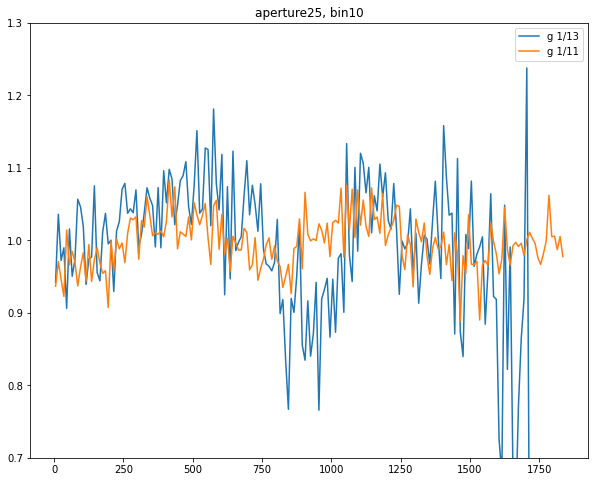

In [15]:

for aperture in apertures:
    file_g = "/alps/south/reduced/20220111_analyzed/movies/WD_triccs18/g_band/target_processed_898348313253395968_lc%d.npz" % aperture
    file_r = "/alps/south/reduced/20220113_analyzed/movies/WD_triccs18/g_band/target_processed_898348313253395968_lc%d.npz" % aperture
    data_g = np.load(file_g)
    data_r = np.load(file_r)
    lc_g = [data_g["time"] - np.min(data_g["time"]), data_g["least_lc"]]
    lc_r = [data_r["time"]- np.min(data_r["time"]), data_r["least_lc"]]
    lc_g_bin = movie_lc_ana.make_bin_lc(data_g["time"]- np.min(data_g["time"]), data_g["least_lc"], bin_t)
    lc_r_bin = movie_lc_ana.make_bin_lc(data_r["time"]- np.min(data_r["time"]), data_r["least_lc"], bin_t)

    plt.figure(figsize = (10,8))
    plt.plot(lc_r[0], lc_r[1], label="g 1/11")
    plt.plot(lc_g[0], lc_g[1], label="g 1/13")
    plt.legend()
    plt.ylim(0.7,1.3)
    plt.title("aperture%d, non-bin" % aperture)

    plt.show()
    plt.figure(figsize = (10,8))

    plt.plot(lc_r_bin.time.value, lc_r_bin.flux.value, label="g 1/13")
    plt.plot(lc_g_bin.time.value, lc_g_bin.flux.value, label="g 1/11")
    plt.legend()
    plt.ylim(0.7,1.3)
    plt.title("aperture%d, bin%d" % (aperture,bin_t))

    plt.show()

